# Goal

* Exploring potential methods of comparing HR-SIP gradient data (compositional data) that reflects differences in peak height/width/location in eudlidean space (absolute abundances)

# Init

In [56]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [57]:
%%R
library(dplyr)
library(tidyr)
library(ggplot2)
library(compositions)
library(coenocliner)
library(vegan)
library(gridExtra)

# Creating test communities

* varying parameters:
  * peak locations (species optima)
  * peak widths (species tolerances)
  * peak heights (max abundances)

## Varying peak locations

In [58]:
%%R 
set.seed(2)
M = 1000                                      # number of species
ming = 1.67323                                # gradient minimum...
maxg = 1.76                                # ...and maximum
#meang = mean(c(ming, maxg))
meang = 1.71
locs = seq(ming, maxg, length = 30)        # gradient locations
opt  = rnorm(M, mean=meang, sd=0.005)          # runif(M, min = ming, max = maxg)   # species optima
tol  = rep(0.005, M)                       # species tolerances
h    = ceiling(rlnorm(M, meanlog = 11))    # max abundances
pars = cbind(opt = opt, tol = tol, h = h)  # put in a matrix

[1] 420828095


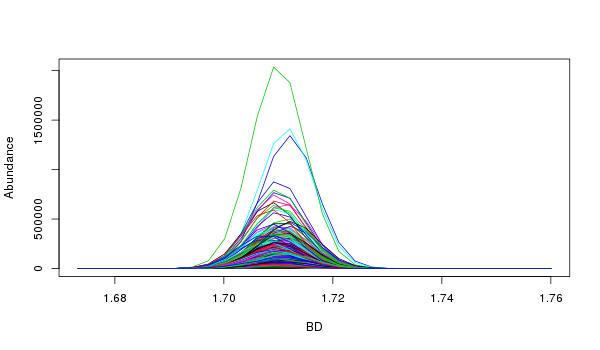

In [59]:
%%R -w 600 -h 350
opt1  = rnorm(M, mean=meang, sd=0.001)
pars = cbind(opt = opt1, tol = tol, h = h)  # put in a matrix

PL1 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 

# community total abundance
apply(PL1 %>% as.matrix, 1, sum) %>% sum %>% print

matplot(locs, PL1, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

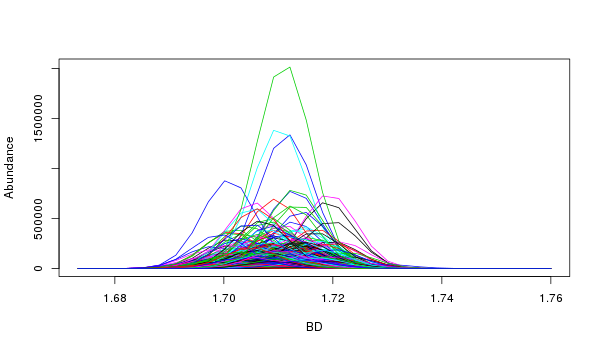

In [60]:
%%R -w 600 -h 350
opt1  = rnorm(M, mean=meang, sd=0.005)
pars = cbind(opt = opt1, tol = tol, h = h)  # put in a matrix

PL2 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 


matplot(locs, PL2, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

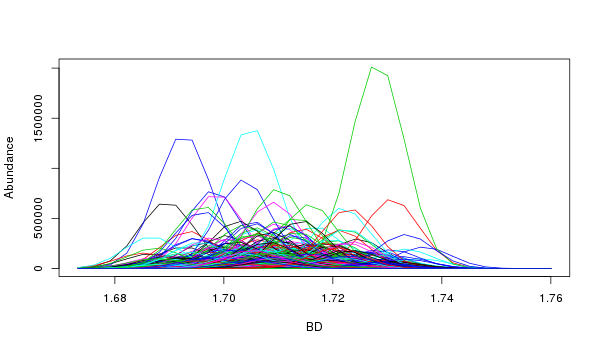

In [61]:
%%R -w 600 -h 350
opt1  = rnorm(M, mean=meang, sd=0.01)
pars = cbind(opt = opt1, tol = tol, h = h)  # put in a matrix

PL3 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 


matplot(locs, PL3, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

## Varying peak widths

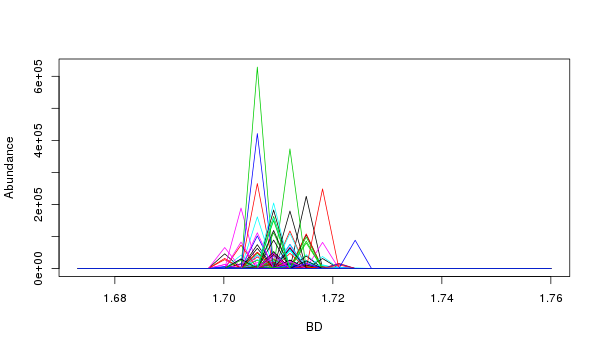

In [62]:
%%R -w 600 -h 350
tol1  = rep(0.0001, M)                       # species tolerances
pars = cbind(opt = opt, tol = tol1, h = h)  # put in a matrix

PW1 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 


matplot(locs, PW1, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

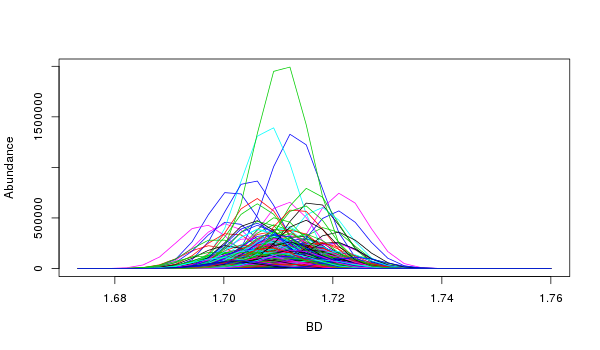

In [63]:
%%R -w 600 -h 350
tol1  = rep(0.005, M)                       # species tolerances
pars = cbind(opt = opt, tol = tol1, h = h)  # put in a matrix

PW2 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 


matplot(locs, PW2, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

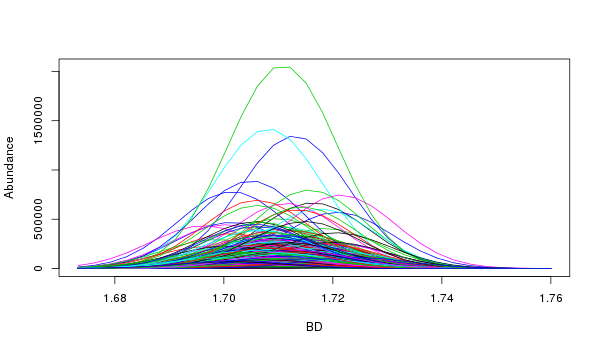

In [64]:
%%R -w 600 -h 350
tol1  = rep(0.01, M)                       # species tolerances
pars = cbind(opt = opt, tol = tol1, h = h)  # put in a matrix

PW3 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 

matplot(locs, PW3, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

## Varying peak heights

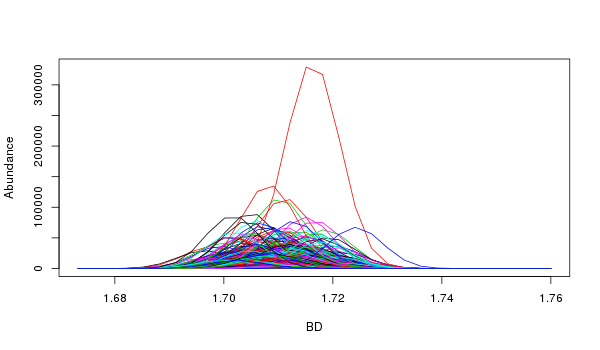

In [65]:
%%R -w 600 -h 350
h1    = ceiling(rlnorm(M, meanlog = 9))    # max abundances
pars = cbind(opt = opt, tol = tol, h = h1)  # put in a matrix

PH1 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 

matplot(locs, PH1, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

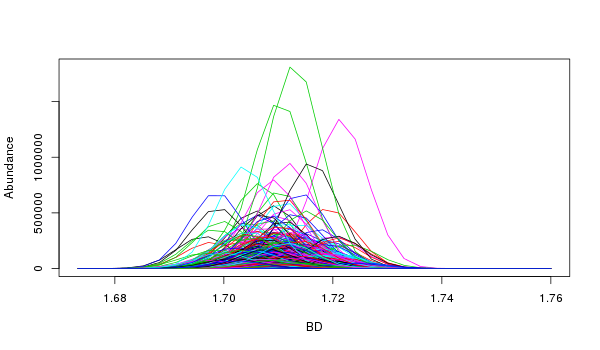

In [66]:
%%R -w 600 -h 350
h1    = ceiling(rlnorm(M, meanlog = 11))    # max abundances
pars = cbind(opt = opt, tol = tol, h = h1)  # put in a matrix

PH2 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 

matplot(locs, PH2, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

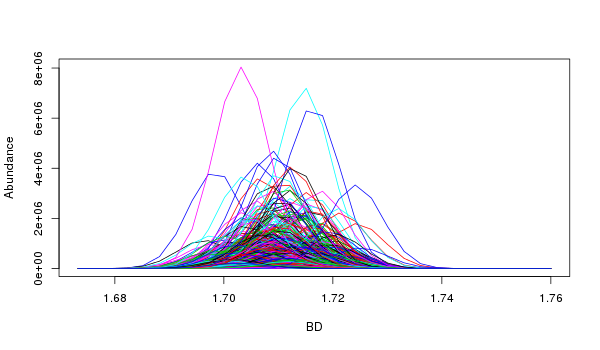

In [67]:
%%R -w 600 -h 350
h1    = ceiling(rlnorm(M, meanlog = 13))    # max abundances
pars = cbind(opt = opt, tol = tol, h = h1)  # put in a matrix

PH3 <- coenocline(locs, responseModel = "gaussian", params = pars,
                    countModel = "poisson") 

matplot(locs, PH3, lty = "solid", type = "l", xlab = "BD", ylab = "Abundance")

In [68]:
%%R
# making a list
comm.l = list(
"PL1" = PL1,
"PL2" = PL2,
"PL3" = PL3,
"PW1" = PW1,
"PW2" = PW2,
"PW3" = PW3,
"PH1" = PH1,
"PH2" = PH2,
"PH3" = PH3
)
comm.l %>% names

[1] "PL1" "PL2" "PL3" "PW1" "PW2" "PW3" "PH1" "PH2" "PH3"


# Adding tail-end abundances

In [69]:
%%R

add.tail.abund = function(mtx){
    nzero = mtx[mtx == 0] %>% length
    mtx[mtx == 0] = round(runif(nzero, 0, 1), 0)
    return(mtx)
    }

comm.l = lapply(comm.l, add.tail.abund)
comm.l = lapply(comm.l, add.tail.abund)
comm.l[[1]][1:5, 1:5]

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    1    1    0    1
[2,]    0    1    1    1    1
[3,]    1    1    0    0    1
[4,]    0    1    1    1    0
[5,]    3    1    0    1    1


# Converting to relative abundances

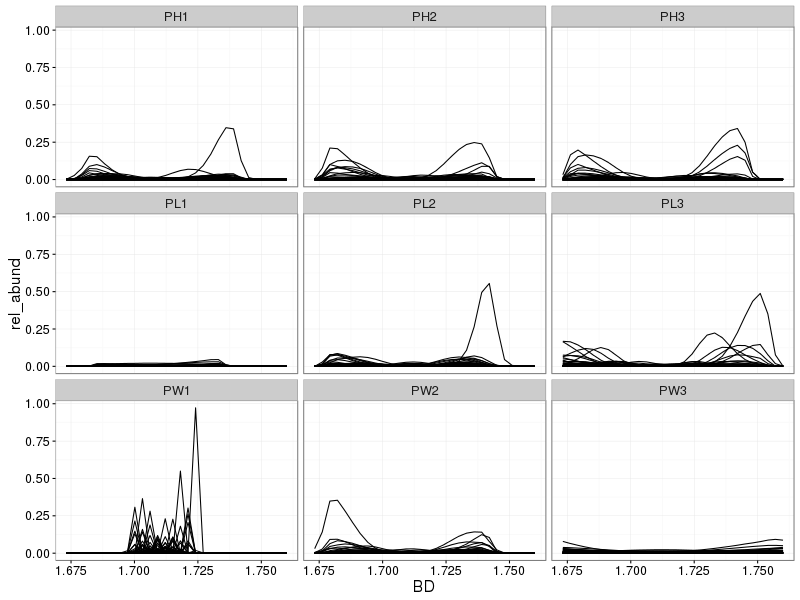

In [70]:
%%R -w 800 -h 600

to.rel = function(x){
    y = sum(x)
    if(y == 0){
        return(x)
    } else {
        return(x / y)
    }
}

comm.l.rel = lapply(comm.l, function(x) x %>% apply(1, to.rel) %>% t %>% as.data.frame)
        
df.rel = do.call(rbind, comm.l.rel) %>% as.data.frame
df.rel$BD = rep(locs, comm.l.rel %>% names %>% length)
df.rel$dataset = rownames(df.rel)
df.rel = df.rel %>%
    gather(OTU, rel_abund, starts_with('V')) %>%
    mutate(dataset = gsub('\\.[0-9]+$', '', dataset))

p1 = ggplot(df.rel, aes(BD, rel_abund, group=OTU)) +
    geom_line() +
    facet_wrap(~dataset) +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )
p1

# Comparing communities

## Shannon diversity

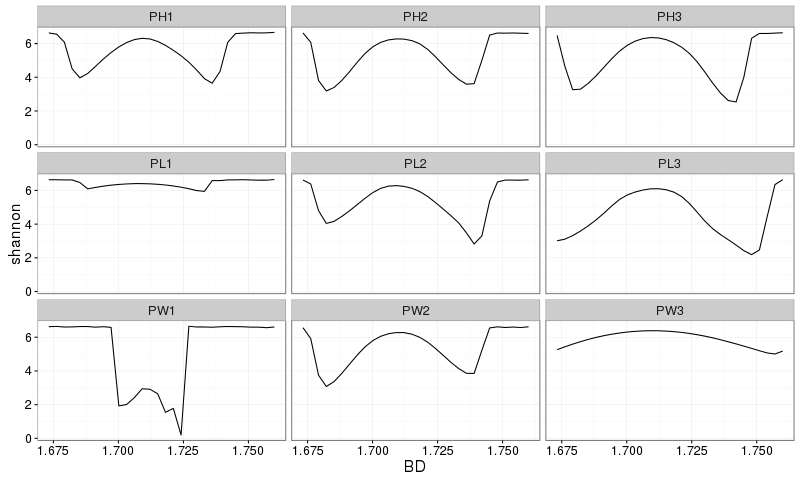

In [71]:
%%R -w 800
df.shan = lapply(comm.l.rel, function(x) diversity(x))
df.shan = do.call(rbind, df.shan) %>% t %>% as.data.frame
df.shan$BD = locs
df.shan = df.shan %>%
    gather(dataset, shannon, starts_with('P'))

p1 = ggplot(df.shan, aes(BD, shannon)) +
    geom_line() +
    facet_wrap(~dataset) +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )
p1


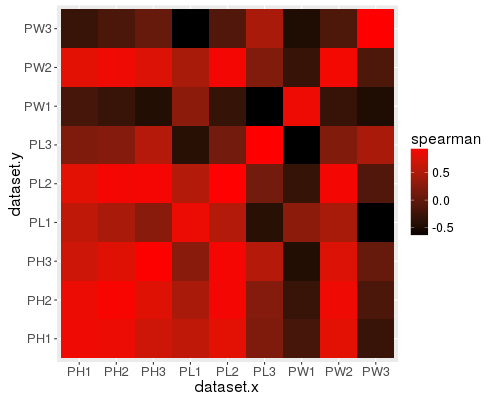

In [72]:
%%R -w 500 -h 400
# pairwise correlations for each dataset
df.shan.bin = df.shan %>%
    group_by(BD_bin = ntile(BD, 24))

calc.spearman = function(x){
    cor(x[,'shannon.x'], x['shannon.y'], method='spearman')[1,1]
}

df.shan.corr = inner_join(df.shan.bin, df.shan.bin, c('BD_bin' = 'BD_bin')) %>%
    group_by(dataset.x, dataset.y) %>%
    nest() %>%
    mutate(model = purrr::map(data, calc.spearman)) %>%
    unnest(spearman = model %>% purrr::map(function(x) x)) %>%
    ungroup() %>%
    select(-data, -model) 
        
 # plotting
ggplot(df.shan.corr, aes(dataset.x, dataset.y, fill=spearman)) +
    geom_tile() +
    scale_fill_gradient(low='black', high='red') +
    theme(
        text = element_text(size=16)
    )       

## Compositional variance

In [73]:
%%R

total.acomp.var = function(x){
    x.acomp = acomp(x)
    variation(x.acomp) %>% lower.tri %>% sum
    }

lapply(comm.l.rel, total.acomp.var)

$PL1
[1] 499500

$PL2
[1] 499500

$PL3
[1] 499500

$PW1
[1] 499500

$PW2
[1] 499500

$PW3
[1] 499500

$PH1
[1] 499500

$PH2
[1] 499500

$PH3
[1] 499500



## Variance by fraction

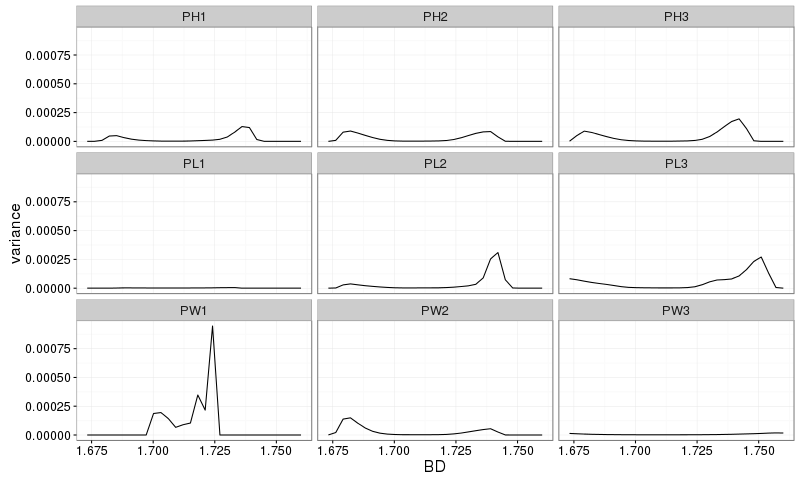

In [74]:
%%R -w 800

comm.l.rel.var = lapply(comm.l.rel, function(x) apply(x, 1, var))
df.var = do.call(rbind, comm.l.rel.var) %>% t %>% as.data.frame
df.var$BD = locs
df.var = df.var %>%
    gather(dataset, variance, starts_with('P'))

p1 = ggplot(df.var, aes(BD, variance)) +
    geom_line() +
    facet_wrap(~dataset) +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )
p1

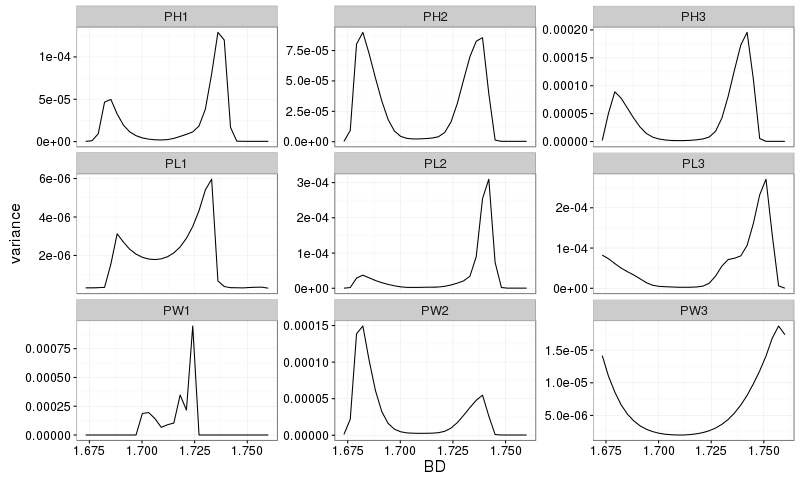

In [75]:
%%R -w 800
p1 + facet_wrap(~ dataset, scale='free_y')

### Pairwise spearman correlations

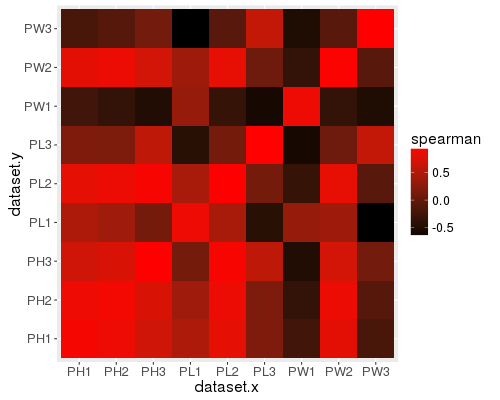

In [76]:
%%R -w 500 -h 400
# pairwise correlations for each dataset
df.var.bin = df.var %>%
    group_by(BD_bin = ntile(BD, 24))

calc.spearman = function(x){
    cor(x[,'variance.x'], x['variance.y'], method='spearman')[1,1]
}


df.var.corr = inner_join(df.var.bin, df.var.bin, c('BD_bin' = 'BD_bin')) %>%
    group_by(dataset.x, dataset.y) %>%
    nest() %>%
    mutate(model = purrr::map(data, calc.spearman)) %>%
    unnest(spearman = model %>% purrr::map(function(x) x)) %>%
    ungroup() %>%
    select(-data, -model) 

        
 # plotting
ggplot(df.var.corr, aes(dataset.x, dataset.y, fill=spearman)) +
    geom_tile() +
    scale_fill_gradient(low='black', high='red') +
    theme(
        text = element_text(size=16)
    )       

### Comparing Shannon & variance spearman values

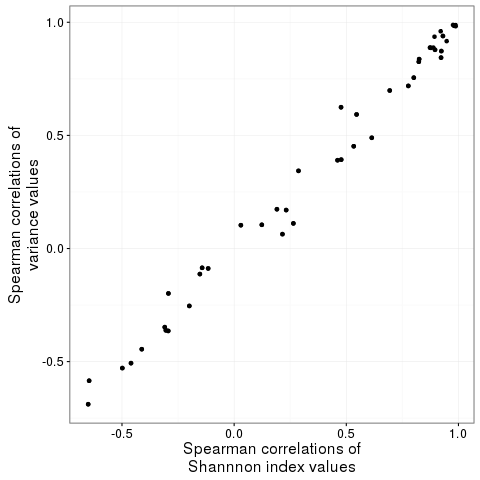

In [77]:
%%R
# plotting shannon vs variance spearman correlations

df.corr.j = inner_join(df.shan.corr, df.var.corr, c('dataset.x' = 'dataset.x',
                                                    'dataset.y' = 'dataset.y'))
                       
ggplot(df.corr.j, aes(spearman.x, spearman.y)) +
    geom_point() +
    labs(x='Spearman correlations of\nShannnon index values',
         y='Spearman correlations of\nvariance values') +
    theme_bw() +
    theme(
        text = element_text(size=16)
    )

#### Notes

* Variance and Shannon index are measuring approx. the same thing (at least for these communities)!

## Correlogram

In [78]:
%%R

BD.diffs = function(BDs){
    df.BD = expand.grid(BDs, BDs)
    df.BD$diff = df.BD %>% apply(1, diff) %>% abs %>% as.vector

    df.BD = df.BD %>%
        spread(Var1, diff) 
    rownames(df.BD) = df.BD$Var2
    df.BD$Var2 = NULL
    dist.BD = df.BD %>% as.matrix
    dist.BD[upper.tri(dist.BD, diag=TRUE)] = 0
    dist.BD %>% as.dist
    }

dist.BDs = BD.diffs(locs)
dist.BDs %>% length

[1] 435


### Bray-Curtis

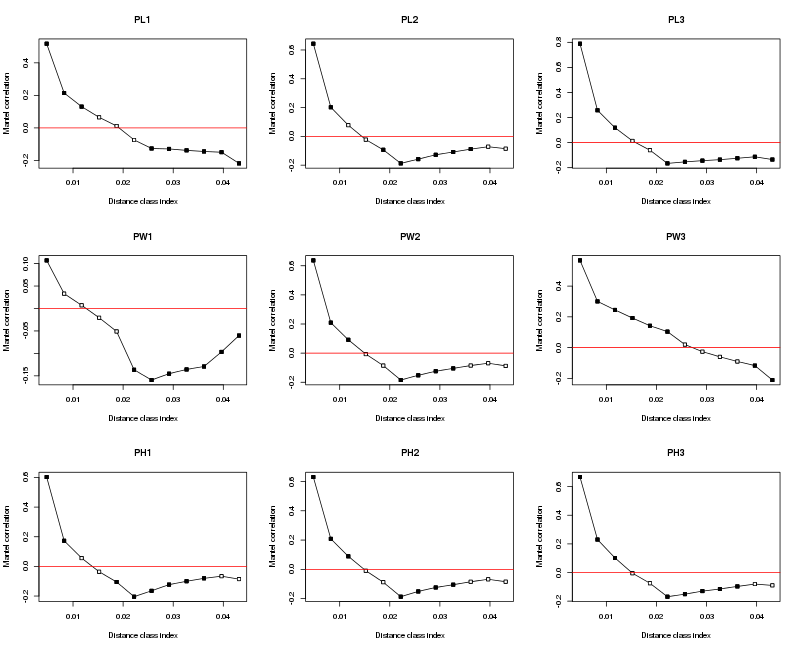

In [86]:
%%R -w 800 -h 650

cal.corr = function(df, BDs, nclass=24, ...){
    d = vegdist(df, ...)
    d[is.nan(d)] = 0
    stopifnot((d %>% length) == (BDs %>% length))
    
    mantel.correlog(d, BDs, n.class=nclass)
}

corr.l = lapply(comm.l.rel, cal.corr, BDs=dist.BDs)

par(mfrow=c(3,3))
for (n in names(corr.l)){
    plot(corr.l[[n]])
    title(n)
}

#### Notes:

* The shift to negative correlations at an index of ~0.025 is likely due to the difference in community composition between the tails and center. 
* The small up-tick at the highest distance classes is due to making the comparison span both tails, but still negative due to including comparisons between tails and center of gradient.
* The analysis seems most sensitive to euclidean peak width
  * broader peaks = more autocorrelation (as expected)
* Peak location seems to affect the strength of correlation
  * more disperse peaks = higher correlation values 
    * this is due to more autocorrelation across the entire gradient 

### Pairwise linear regressions for each dataset

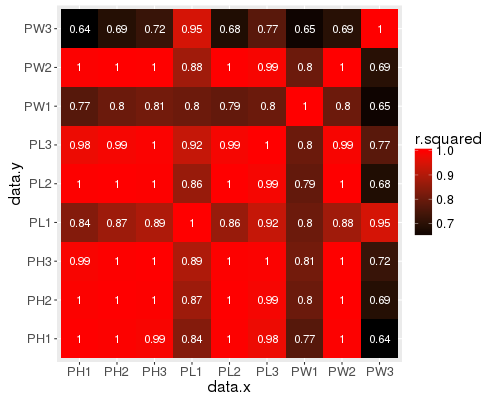

In [87]:
%%R -w 500 -h 400
# converting to dataframe
tmp.l = list()
for(x in names(corr.l)){
    tmp = corr.l[[x]][1][['mantel.res']] %>% as.data.frame
    tmp$data = x
    tmp = tmp %>%
        filter(!is.na(Mantel.cor)) %>%
        group_by(class.index.bin = ntile(class.index, 12)) 
    tmp.l[[x]] = tmp
}
df.corr = do.call(rbind, tmp.l) %>%
    as.data.frame 

# pairwise linear regressions for each dataset
df.corr = inner_join(df.corr, df.corr, c('class.index.bin' = 'class.index.bin')) %>%
    group_by(data.x, data.y) %>%
    nest() %>%
    mutate(model = purrr::map(data, ~lm(Mantel.cor.y ~ Mantel.cor.x, data=.))) %>%
    unnest(model %>% purrr::map(broom::glance)) %>%
    ungroup() %>%
    select(-data, -model) %>%
    mutate(r.squared_txt = round(r.squared, 2))
    

# plotting
ggplot(df.corr, aes(data.x, data.y, fill=r.squared)) +
    geom_tile() +
    geom_text(aes(label=r.squared_txt), color='white', size=4) +
    scale_fill_gradient(low='black', high='red') +
    theme(
        text = element_text(size=16)
    )

### Binary

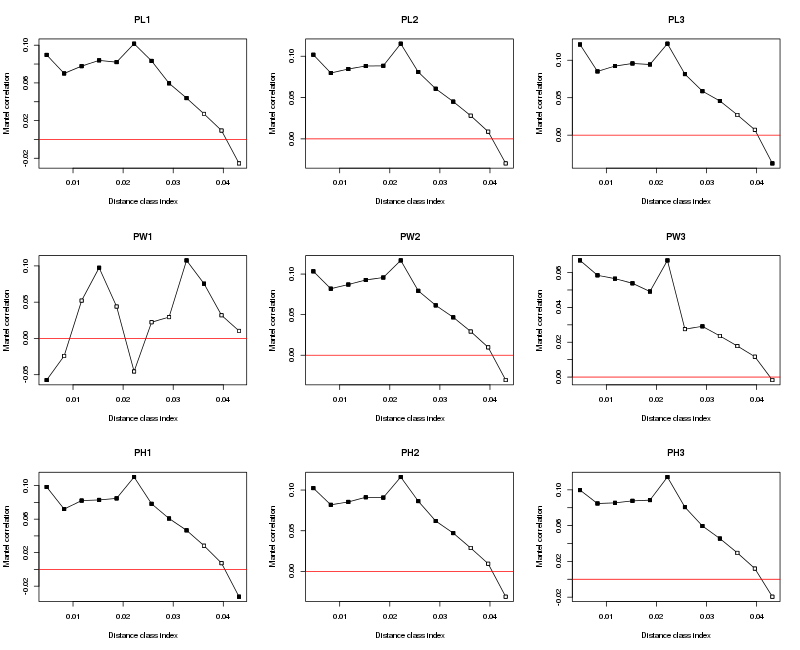

In [83]:
%%R -w 800 -h 650

corr.l = lapply(comm.l.rel, cal.corr, BDs=dist.BDs, binary=TRUE, method='jaccard')

par(mfrow=c(3,3))
for (n in names(corr.l)){
    plot(corr.l[[n]])
    title(n)
}

#### Notes

* The peak correlations at ~0.025 is due to the simulated 'smearing' that I included.
  * The smearing caused the tails to contain most of the taxa in the center of the gradient
  * The approx. extact center of the gradient should have the most overlap of taxa and thus the most correlation with the tails.
* The difference between these plots and the emperical data suggest that this simple smearing simulation is not adequate. 
  * I would probably need to make the smearing related to pre-fractionation taxon abundance

### Pairwise linear regressions

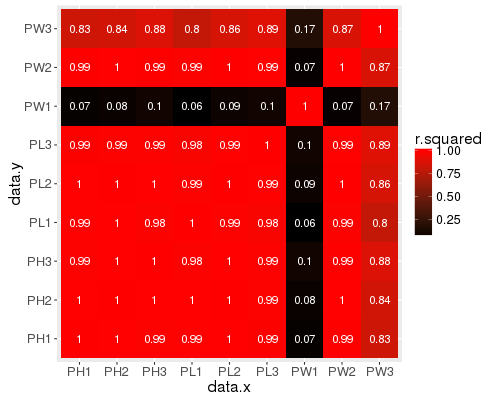

In [84]:
%%R -w 500 -h 400
# converting to dataframe
tmp.l = list()
for(x in names(corr.l)){
    tmp = corr.l[[x]][1][['mantel.res']] %>% as.data.frame
    tmp$data = x
    tmp = tmp %>%
        filter(!is.na(Mantel.cor)) %>%
        group_by(class.index.bin = ntile(class.index, 12)) 
    tmp.l[[x]] = tmp
}
df.corr = do.call(rbind, tmp.l) %>%
    as.data.frame 

# pairwise linear regressions for each dataset
df.corr = inner_join(df.corr, df.corr, c('class.index.bin' = 'class.index.bin')) %>%
    group_by(data.x, data.y) %>%
    nest() %>%
    mutate(model = purrr::map(data, ~lm(Mantel.cor.y ~ Mantel.cor.x, data=.))) %>%
    unnest(model %>% purrr::map(broom::glance)) %>%
    ungroup() %>%
    select(-data, -model) %>%
    mutate(r.squared_txt = round(r.squared, 2))
    

# plotting
ggplot(df.corr, aes(data.x, data.y, fill=r.squared)) +
    geom_tile() +
    geom_text(aes(label=r.squared_txt), color='white', size=4) +
    scale_fill_gradient(low='black', high='red') +
    theme(
        text = element_text(size=16)
    )